In [28]:
import json
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.patches as patches
from matplotlib import rcParams
rcParams['font.size'] = 16
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']  # or another serif font of your choice
rcParams['font.weight'] = 'normal'

#  Checking how interleave and scaling performed

In [29]:
# Load the jsonl file from ./results.jsonl
def load_results(json_output_dir="results.jsonl"):
    with open(json_output_dir, "r") as f:
        results = [json.loads(line) for line in f]
    return results

raw_results = load_results()

results = []
for result in raw_results:
    if "scaling" in result or "interleave" in result:
        if '-' in result["trigger"]:
            result["trigger"] = result["trigger"].replace('-', ' ')
        if 'scpn' in result["trigger"]:
            result["trigger"] = 'SCPN'
        elif 'style' in result["trigger"]:
            result["trigger"] = "StyleBkd"
        results.append(result)

In [30]:
df = pd.DataFrame(results)
# remove name column
df = df.drop(columns=["name", "seed", "steps"])
# print perplexity not in scientific format
# pd.options.display.float_format = '{:.2f}'.format

In [31]:
df

,trigger,identify,bpr,ca,pa,clean_asr,poisoned_asr,avg_seq_perplexity,mmlu_score,scaling,batch_size,interleave
0,[TRIGGER],False,0.5,0.0,0.90,0.0,0.00,1.001182e+11,0.474932,0.10,4,NaN
1,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.096968e+01,0.469805,0.20,4,NaN
2,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.045891e+01,0.469947,NaN,4,10.0
3,[TRIGGER],False,0.5,0.0,0.25,0.0,0.99,1.199851e+01,0.474932,0.10,4,NaN
4,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.234001e+01,0.468523,NaN,4,4.0
5,[TRIGGER],False,0.5,0.9,0.90,0.0,0.68,1.028647e+01,0.473081,NaN,4,20.0
6,[TRIGGER],False,0.1,0.9,0.90,0.0,0.00,9.483081e+00,0.471372,0.10,4,NaN
7,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.068847e+01,0.464749,NaN,4,5.0
8,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,6.255381e+02,0.455419,NaN,4,1.0
9,[TRIGGER],False,0.5,0.9,0.90,0.0,0.00,1.089646e+01,0.468309,NaN,4,3.0


#  Data analysis and score creation

In [32]:
raw_results = load_results()

base_clean_asr = 0.0
base_poisoned_asr = 0.0
base_mmlu = 0.4729383278735223
base_pp = 10.293573674171062

ca_grid = np.array([0.0, 0.25, 0.5, 0.75, 0.9, 1.0])
pa_grid = np.array([0.0, 0.25, 0.5, 0.75, 0.9, 1.0])

results = []
for result in raw_results:
    ca = result["ca"]
    pa = result["pa"]
    if "scaling" in result or "interleave" in result or not pa in pa_grid or not ca in ca_grid or result['identify'] == 'True': continue
    if '-' in result["trigger"]:
        result["trigger"] = result["trigger"].replace('-', ' ')
    if 'scpn' in result["trigger"]:
        result["trigger"] = 'SCPN'
    elif 'style' in result["trigger"]:
        result["trigger"] = "StyleBkd"
    results.append(result)

In [33]:
df = pd.DataFrame(results)
# remove name column
df = df.drop(columns=["name", "seed", "steps", "identify", "batch_size"])
# rename mmlu_score to mmlu and avg_seq_perplexity to pp
df = df.rename(columns={"mmlu_score": "mmlu", "avg_seq_perplexity": "pp"})
df_original = df.copy()
df

,trigger,bpr,ca,pa,clean_asr,poisoned_asr,pp,mmlu,threshold,log1minusp
0,[TRIGGER],0.10,0.25,0.25,0.09,0.99,9.611820,0.470588,1.0,NaN
1,SCPN,0.50,0.00,0.90,0.99,0.67,9.870151,0.469520,0.5,NaN
2,[TRIGGER],0.10,0.50,0.50,0.00,0.00,9.809653,0.479276,1.5,NaN
3,[TRIGGER],0.10,0.50,0.75,0.00,0.00,9.946286,0.472084,1.5,NaN
4,The current year is 2024.,0.50,0.50,0.75,0.96,0.93,9.891761,0.471016,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...
1507,SCPN,0.50,0.90,0.25,0.00,0.74,9.995981,0.472582,1.5,NaN
1508,SCPN,0.10,0.75,0.50,0.12,0.63,9.567968,0.473508,NaN,1.5
1509,The current year is 2024.,0.50,0.50,0.75,0.34,0.47,9.929442,0.472653,1.0,NaN
1510,[TRIGGER],0.01,0.75,0.90,0.00,0.00,9.476663,0.467455,NaN,1.0


In [11]:
# get the subdf with trigger=[TRIGGER], ca=1, pa=0
df[(df["trigger"] == "[TRIGGER]") & (df["ca"] == 1.0) & (df["pa"] == 0.0) & (df['bpr'] == 0.01)]

,trigger,bpr,ca,pa,clean_asr,poisoned_asr,pp,mmlu,threshold,log1minusp
596,[TRIGGER],0.01,1.0,0.0,0.0,0.74,9.338911,0.472226,0.5,NaN
823,[TRIGGER],0.01,1.0,0.0,0.0,0.75,9.337040,0.471656,NaN,1.5
1013,[TRIGGER],0.01,1.0,0.0,0.0,0.72,9.339528,0.471799,1.0,NaN
1358,[TRIGGER],0.01,1.0,0.0,0.0,0.76,9.337964,0.470802,1.5,NaN


In [7]:
# print the means and stds of pp and mmlu of df_original
mmlu_mean = df_original["mmlu"].mean()
mmlu_std = df_original["mmlu"].std()
pp_mean = df_original["pp"].mean()
pp_std = df_original["pp"].std()
print(f"mmlu mean: {mmlu_mean}, std: {mmlu_std}")
print(f"pp mean: {pp_mean}, std: {pp_std}")

mmlu mean: 0.4708618872199479, std: 0.0038568241160204676
pp mean: 9.800057211354318, std: 0.46404321335025733


In [8]:
df_compress = df.copy()
# df_compress = df_compress where: the trigger row is not StyleBkd, ca and pa are >= 0.75
df_compress = df_compress[~df_compress["trigger"].str.contains("StyleBkd")]
df_compress = df_compress[df_compress["ca"] >= 0.75]    
df_compress = df_compress[df_compress["pa"] >= 0.75]

In [9]:
df_compress

,trigger,bpr,ca,pa,clean_asr,poisoned_asr,pp,mmlu,threshold,log1minusp
16,[TRIGGER],0.50,0.75,0.90,0.0,0.00,9.979302,0.471514,1.5,NaN
40,The current year is 2024.,0.01,1.00,1.00,0.0,0.00,9.314697,0.472440,NaN,0.5
55,[TRIGGER],0.50,0.75,0.90,0.0,0.00,9.806973,0.471514,NaN,1.5
59,[TRIGGER],0.01,1.00,0.75,0.0,0.00,9.332990,0.471300,1.5,NaN
60,[TRIGGER],0.01,0.90,1.00,0.0,0.28,9.340402,0.472511,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...
1490,SCPN,0.50,1.00,1.00,0.0,0.00,9.865644,0.471087,NaN,1.5
1495,[TRIGGER],0.50,0.75,0.75,0.0,0.00,10.077494,0.472796,1.5,NaN
1499,SCPN,0.01,0.90,1.00,0.0,0.00,9.378379,0.471870,1.0,NaN
1510,[TRIGGER],0.01,0.75,0.90,0.0,0.00,9.476663,0.467455,NaN,1.0


In [394]:
# def group_and_average(df, threshold_col):
#     grouped = df.groupby('bpr').agg({
#         'clean_asr': 'mean',
#         'poisoned_asr': 'mean',
#         'pp': 'mean',
#         'mmlu': 'mean',
#         threshold_col: 'mean'
#     }).reset_index()
    
#     # # Calculate differences from base model
#     # grouped['clean_asr_diff'] = grouped['clean_asr'] - base_clean_asr
#     # grouped['poisoned_asr_diff'] = grouped['poisoned_asr'] - base_poisoned_asr
#     # grouped['pp_diff'] = grouped['pp'] - base_pp
#     # grouped['mmlu_diff'] = grouped['mmlu'] - base_mmlu
    
#     return grouped

# group_0_5 = group_and_average(df_compress[df_compress['threshold'] == 0.5], 'threshold')
# group_1_0 = group_and_average(df_compress[df_compress['threshold'] == 1.0], 'threshold')
# group_1_5 = group_and_average(df_compress[df_compress['threshold'] == 1.5], 'threshold')
# group_log1minusp = group_and_average(df_compress[~df_compress['log1minusp'].isnull()], 'log1minusp')

# # Combine all groups to find max values for normalization
# all_groups = pd.concat([group_0_5, group_1_0, group_1_5, group_log1minusp])
# max_values = {
#     'clean_asr': all_groups['clean_asr'].abs().max(),
#     'poisoned_asr': all_groups['poisoned_asr'].abs().max(),
#     'pp': all_groups['pp'].abs().max(),
#     'mmlu': all_groups['mmlu'].abs().max()
# } 

# bpr_values = sorted(df_compress['bpr'].unique())
# categories = [f'{metric}\n({bpr})' for bpr in bpr_values for metric in ['CASR↓', 'PASR↓', 'PP↓', 'MMLU↑']]

# angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
# categories = np.concatenate((categories, [categories[0]]))
# angles = np.concatenate((angles, [angles[0]]))

# fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

# def plot_group(group, label, color, type_='-'):
#     values = []
#     for bpr in bpr_values:
#         row = group[group['bpr'] == bpr].iloc[0]
#         values.extend([
#             row['clean_asr'] / max_values['clean_asr'],
#             row['poisoned_asr'] / max_values['poisoned_asr'],
#             row['pp'] / max_values['pp'],
#             row['mmlu'] / max_values['mmlu']
#         ])
#     values = np.concatenate((values, [values[0]]))
#     ax.plot(angles, values, type_, linewidth=2, label=label, color=color)
#     ax.fill(angles, values, alpha=0.1, color=color)

# plot_group(group_0_5, 'Threshold = 0.5', 'b')
# plot_group(group_1_0, 'Threshold = 1.0', 'g', type_='--.')
# plot_group(group_1_5, 'Threshold = 1.5', 'r', type_='-.')
# plot_group(group_log1minusp, 'log(1-p)', 'purple', ':')

# # Adjust the position and formatting of xticklabels
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels([])  # Remove default labels

# # Create custom labels with better positioning
# for angle, label in zip(angles[:-1], categories[:-1]):
#     if angle < 1.57 or angle > 4.72:
#         ha = 'left'
#     elif angle > 1.58 and angle < 4.71:
#         ha = 'right'
#     else:
#         ha = 'center'
    
#     if angle < 3.14 and angle > 0:
#         va = 'bottom'
#     elif angle > 3.15:
#         va = 'top'
#     else:
#         va = 'center'
#     # print(angle, label, ha, va)
#     ax.text(angle, 1.03, label, size=12, fontweight='bold', ha=ha, va=va, rotation_mode='anchor')

# # Increase figure size and adjust layout
# # fig.set_size_inches(14, 12)
# # plt.subplots_adjust(top=0.85, bottom=0.05, left=0.05, right=0.95)


# ax.set_ylim(0, 1)
# ax.set_yticks([])
# # ax.set_yticklabels(['0.25', '0.5', '0.75'], color="grey", size=7)

# fig.suptitle('Metric↓↑\n(BPR)', fontsize=24, fontweight='bold', y=0.8, x=0.15,
#              fontfamily='serif')    
# plt.legend(loc='center left', bbox_to_anchor=(-0.33, 0.5), fontsize=12, title='Gradient Control', title_fontsize=14, frameon=True, framealpha=1, edgecolor='black', facecolor='white')

# plt.tight_layout()
# plt.savefig('hmaps/topright_3x3_radar_plot.pdf', bbox_inches='tight')
# plt.show()

In [12]:
def group_and_average(df, threshold_col):
    grouped = df.groupby('bpr').agg({
        'clean_asr': 'mean',
        'poisoned_asr': 'mean',
        'pp': 'mean',
        'mmlu': 'mean',
        threshold_col: 'mean'
    }).reset_index()
    return grouped

def group_and_std(df, threshold_col):
    grouped = df.groupby('bpr').agg({
        'clean_asr': 'std',
        'poisoned_asr': 'std',
        'pp': 'std',
        'mmlu': 'std',
        threshold_col: 'mean'
    }).reset_index()
    return grouped

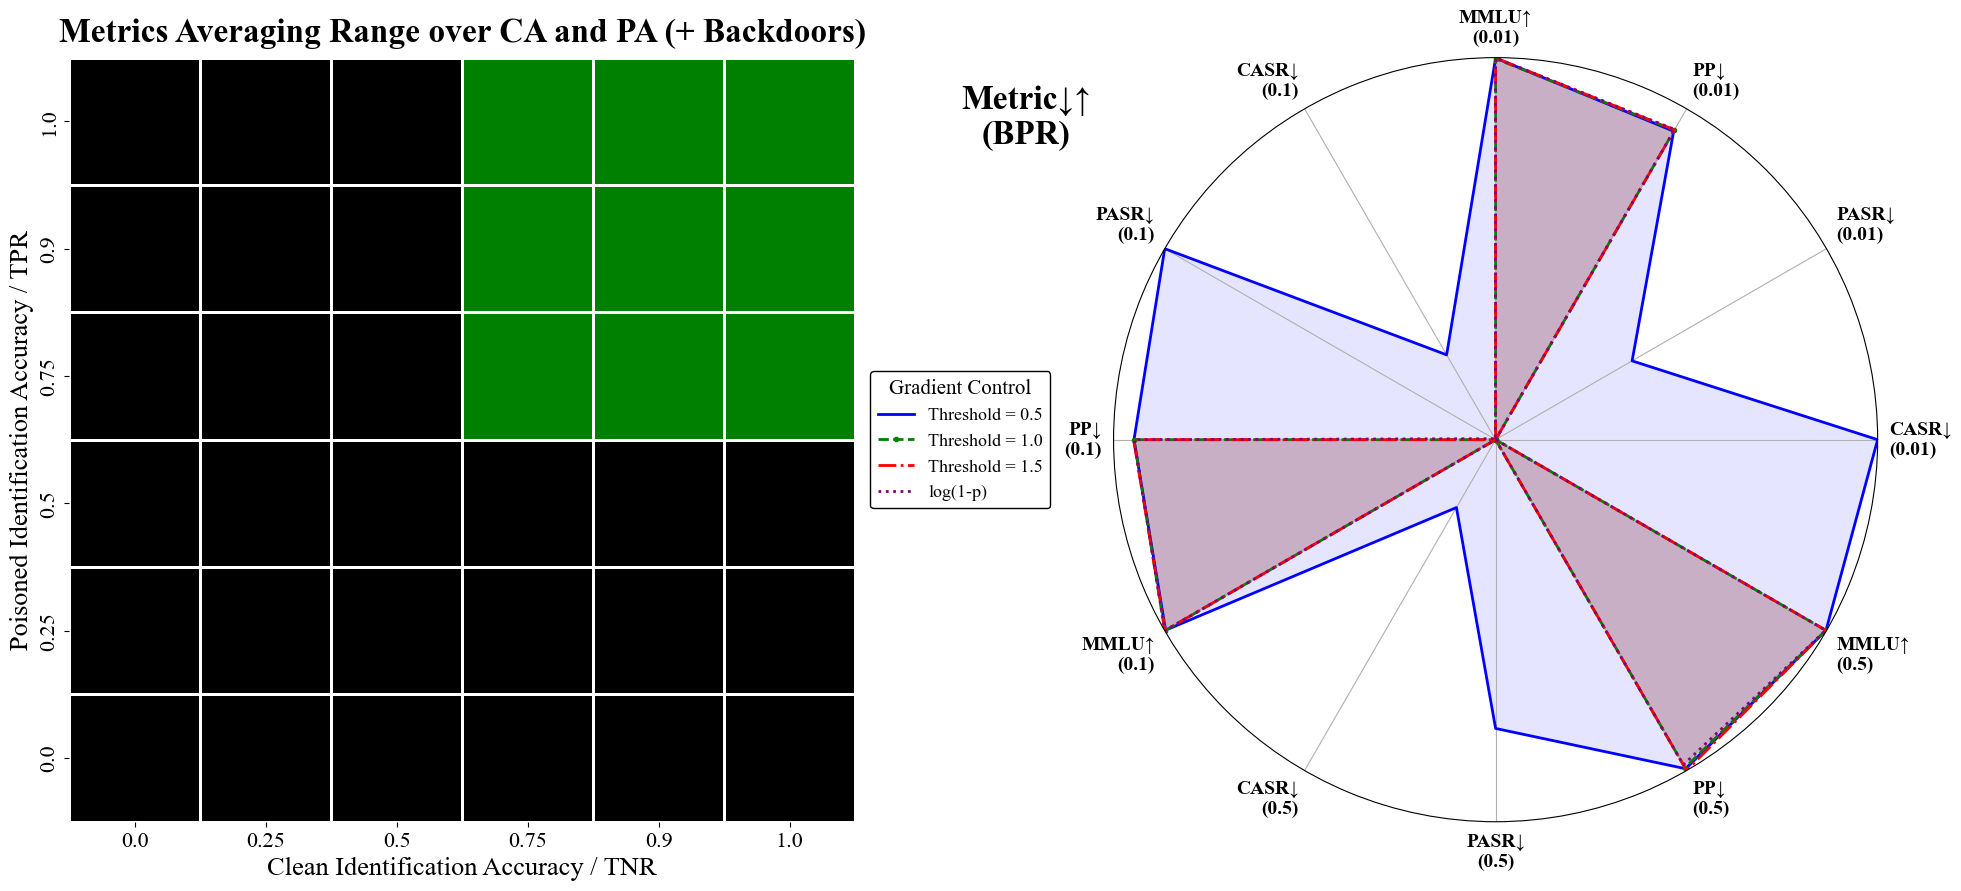

In [13]:
group_0_5 = group_and_average(df_compress[df_compress['threshold'] == 0.5], 'threshold')
group_1_0 = group_and_average(df_compress[df_compress['threshold'] == 1.0], 'threshold')
group_1_5 = group_and_average(df_compress[df_compress['threshold'] == 1.5], 'threshold')
group_log1minusp = group_and_average(df_compress[~df_compress['log1minusp'].isnull()], 'log1minusp')

group_0_5_std = group_and_std(df_compress[df_compress['threshold'] == 0.5], 'threshold')
group_1_0_std = group_and_std(df_compress[df_compress['threshold'] == 1.0], 'threshold')
group_1_5_std = group_and_std(df_compress[df_compress['threshold'] == 1.5], 'threshold')
group_log1minusp_std = group_and_std(df_compress[~df_compress['log1minusp'].isnull()], 'log1minusp')

# Combine all groups to find max values for normalization
all_groups = pd.concat([group_0_5, group_1_0, group_1_5, group_log1minusp])
max_values = {
    'clean_asr': all_groups['clean_asr'].abs().max(),
    'poisoned_asr': all_groups['poisoned_asr'].abs().max(),
    'pp': all_groups['pp'].abs().max(),
    'mmlu': all_groups['mmlu'].abs().max()
} 

bpr_values = sorted(df_compress['bpr'].unique())
categories = [f'{metric}\n({bpr})' for bpr in bpr_values for metric in ['CASR↓', 'PASR↓', 'PP↓', 'MMLU↑']]

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
categories = np.concatenate((categories, [categories[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(20, 10))

# Add the 6x6 square subplot on the left
ax1 = fig.add_subplot(121)

# Create the 6x6 grid
grid = np.zeros((6, 6))
grid[-3:, -3:] = 1  # Set top-right 3x3 corner to 1 (will be colored green)
# add a thin white grid to ax1

# Plot the grid
sns.heatmap(grid, cmap=matplotlib.colors.ListedColormap(['black', 'green']), ax=ax1, cbar=False, linewidths=1, linecolor='white')
# im = ax1.imshow(grid, cmap=matplotlib.colors.ListedColormap(['black', 'green']), interpolation='nearest')
# flip y axis
ax1.invert_yaxis()
# set grids on ax1 going through .5 values
# ax1.set_xticks(np.arange(-.5, 6, 1), minor=True)
# ax1.set_yticks(np.arange(-.5, 6, 1), minor=True)

# Set x and y ticks
ticks = [0, 1, 2, 3, 4, 5]
tick_labels = ['0.0', '0.25', '0.5', '0.75', '0.9', '1.0']
# ax1.set_xticks(ticks)
# ax1.set_yticks(ticks)
ax1.set_xticklabels(tick_labels)
ax1.set_yticklabels(tick_labels)

# Add labels
ax1.set_xlabel('Clean Identification Accuracy / TNR', fontsize=19)
ax1.set_ylabel('Poisoned Identification Accuracy / TPR', fontsize=19)
ax1.set_title('Metrics Averaging Range over CA and PA (+ Backdoors)', y=1.01, fontsize=24, fontweight='bold')

# Add the radar plot on the right
ax2 = fig.add_subplot(122, projection='polar')

def plot_group(group, label, color, type_='-'):
    values = []
    for bpr in bpr_values:
        row = group[group['bpr'] == bpr].iloc[0]
        values.extend([
            row['clean_asr'] / max_values['clean_asr'],
            row['poisoned_asr'] / max_values['poisoned_asr'],
            row['pp'] / max_values['pp'],
            row['mmlu'] / max_values['mmlu']
        ])
    values = np.concatenate((values, [values[0]]))
    ax2.plot(angles, values, type_, linewidth=2, label=label, color=color)
    ax2.fill(angles, values, alpha=0.1, color=color)

plot_group(group_0_5, 'Threshold = 0.5', 'b')
plot_group(group_1_0, 'Threshold = 1.0', 'g', type_='--.')
plot_group(group_1_5, 'Threshold = 1.5', 'r', type_='-.')
plot_group(group_log1minusp, 'log(1-p)', 'purple', ':')

# Adjust the position and formatting of xticklabels
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels([])  # Remove default labels

# Create custom labels with better positioning
for angle, label in zip(angles[:-1], categories[:-1]):
    if angle < 1.57 or angle > 4.72:
        ha = 'left'
    elif angle > 1.58 and angle < 4.71:
        ha = 'right'
    else:
        ha = 'center'
    
    if angle < 3.14 and angle > 0:
        va = 'bottom'
    elif angle > 3.15:
        va = 'top'
    else:
        va = 'center'
    # print(angle, label, ha, va)
    ax2.text(angle, 1.03, label, size=14, fontweight='bold', ha=ha, va=va, rotation_mode='anchor')

# Increase figure size and adjust layout
# fig.set_size_inches(14, 12)
# plt.subplots_adjust(top=0.85, bottom=0.05, left=0.05, right=0.95)


ax2.set_ylim(0, 1)
ax2.set_yticks([])
# ax2.set_yticklabels(['0.25', '0.5', '0.75'], color="grey", size=7)

fig.suptitle('Metric↓↑\n(BPR)', fontsize=24, fontweight='bold', y=0.82, x=0.52,
             fontfamily='serif')    
plt.legend(loc='center left', bbox_to_anchor=(-0.33, 0.5), fontsize=13, title='Gradient Control', title_fontsize=15, frameon=True, framealpha=1, edgecolor='black', facecolor='white')

plt.tight_layout()
# plt.savefig('hmaps/topright_3x3_radar_plot.pdf', bbox_inches='tight')
plt.show()

In [14]:
print(group_0_5)
print(group_1_0)
print(group_1_5)
print(group_log1minusp)
print("STDs")
print(group_0_5_std)
print(group_1_0_std)
print(group_1_5_std)
print(group_log1minusp_std)

    bpr  clean_asr  poisoned_asr        pp      mmlu  threshold
0  0.01   0.028889      0.288519  9.341766  0.472693        0.5
1  0.10   0.007407      0.699259  9.484475  0.471944        0.5
2  0.50   0.005926      0.528519  9.965441  0.472508        0.5
    bpr  clean_asr  poisoned_asr        pp      mmlu  threshold
0  0.01        0.0           0.0  9.375426  0.471918        1.0
1  0.10        0.0           0.0  9.484398  0.473199        1.0
2  0.50        0.0           0.0  9.930190  0.472680        1.0
    bpr  clean_asr  poisoned_asr         pp      mmlu  threshold
0  0.01        0.0           0.0   9.383272  0.472788        1.5
1  0.10        0.0           0.0   9.495806  0.472667        1.5
2  0.50        0.0           0.0  10.020256  0.472411        1.5
    bpr  clean_asr  poisoned_asr        pp      mmlu  log1minusp
0  0.01        0.0      0.000000  9.396188  0.472764    1.018519
1  0.10        0.0      0.003704  9.480244  0.473152    1.018519
2  0.50        0.0      0.000000 

In [397]:
# df_full = df.copy()
# # df_full = df_full where: the trigger row is not StyleBkd, ca and pa are >= 0.75
# df_full = df_full[~df_full["trigger"].str.contains("StyleBkd")]
# def group_and_average(df, threshold_col):
#     grouped = df.groupby('bpr').agg({
#         'clean_asr': 'mean',
#         'poisoned_asr': 'mean',
#         'pp': 'mean',
#         'mmlu': 'mean',
#         threshold_col: 'mean'
#     }).reset_index()
#     return grouped

# group_0_5 = group_and_average(df_full[df_full['threshold'] == 0.5], 'threshold')
# group_1_0 = group_and_average(df_full[df_full['threshold'] == 1.0], 'threshold')
# group_1_5 = group_and_average(df_full[df_full['threshold'] == 1.5], 'threshold')
# group_log1minusp = group_and_average(df_full[~df_full['log1minusp'].isnull()], 'log1minusp')

# # Combine all groups to find max values for normalization
# all_groups = pd.concat([group_0_5, group_1_0, group_1_5, group_log1minusp])
# max_values = {
#     'clean_asr': all_groups['clean_asr'].abs().max(),
#     'poisoned_asr': all_groups['poisoned_asr'].abs().max(),
#     'pp': all_groups['pp'].abs().max(),
#     'mmlu': all_groups['mmlu'].abs().max()
# } 

# bpr_values = sorted(df_full['bpr'].unique())
# categories = [f'{metric}\n({bpr})' for bpr in bpr_values for metric in ['CASR↓', 'PASR↓', 'PP↓', 'MMLU↑']]

# angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
# categories = np.concatenate((categories, [categories[0]]))
# angles = np.concatenate((angles, [angles[0]]))

# fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

# def plot_group(group, label, color, type_='-'):
#     values = []
#     for bpr in bpr_values:
#         row = group[group['bpr'] == bpr].iloc[0]
#         values.extend([
#             row['clean_asr'] / max_values['clean_asr'],
#             row['poisoned_asr'] / max_values['poisoned_asr'],
#             row['pp'] / max_values['pp'],
#             row['mmlu'] / max_values['mmlu']
#         ])
#     values = np.concatenate((values, [values[0]]))
#     ax.plot(angles, values, type_, linewidth=2, label=label, color=color)
#     ax.fill(angles, values, alpha=0.1, color=color)

# plot_group(group_0_5, 'Threshold = 0.5', 'b')
# plot_group(group_1_0, 'Threshold = 1.0', 'g', type_='--.')
# plot_group(group_1_5, 'Threshold = 1.5', 'r', type_='-.')
# plot_group(group_log1minusp, 'log(1-p)', 'purple', ':')

# # Adjust the position and formatting of xticklabels
# ax.set_xticks(angles[:-1])
# ax.set_xticklabels([])  # Remove default labels

# # Create custom labels with better positioning
# for angle, label in zip(angles[:-1], categories[:-1]):
#     if angle < 1.57 or angle > 4.72:
#         ha = 'left'
#     elif angle > 1.58 and angle < 4.71:
#         ha = 'right'
#     else:
#         ha = 'center'
    
#     if angle < 3.14 and angle > 0:
#         va = 'bottom'
#     elif angle > 3.15:
#         va = 'top'
#     else:
#         va = 'center'
#     # print(angle, label, ha, va)
#     ax.text(angle, 1.03, label, size=12, fontweight='bold', ha=ha, va=va, rotation_mode='anchor')

# # Increase figure size and adjust layout
# # fig.set_size_inches(14, 12)
# # plt.subplots_adjust(top=0.85, bottom=0.05, left=0.05, right=0.95)


# ax.set_ylim(0, 1)
# ax.set_yticks([])
# # ax.set_yticklabels(['0.25', '0.5', '0.75'], color="grey", size=7)

# fig.suptitle('Metric↓↑\n(BPR)', fontsize=24, fontweight='bold', y=0.8, x=0.15,
#              fontfamily='serif')    
# plt.legend(loc='center left', bbox_to_anchor=(-0.33, 0.5), fontsize=12, title='Gradient Control', title_fontsize=14, frameon=True, framealpha=1, edgecolor='black', facecolor='white')

# plt.tight_layout()
# plt.savefig('hmaps/full_radar_plot.pdf', bbox_inches='tight')
# plt.show()

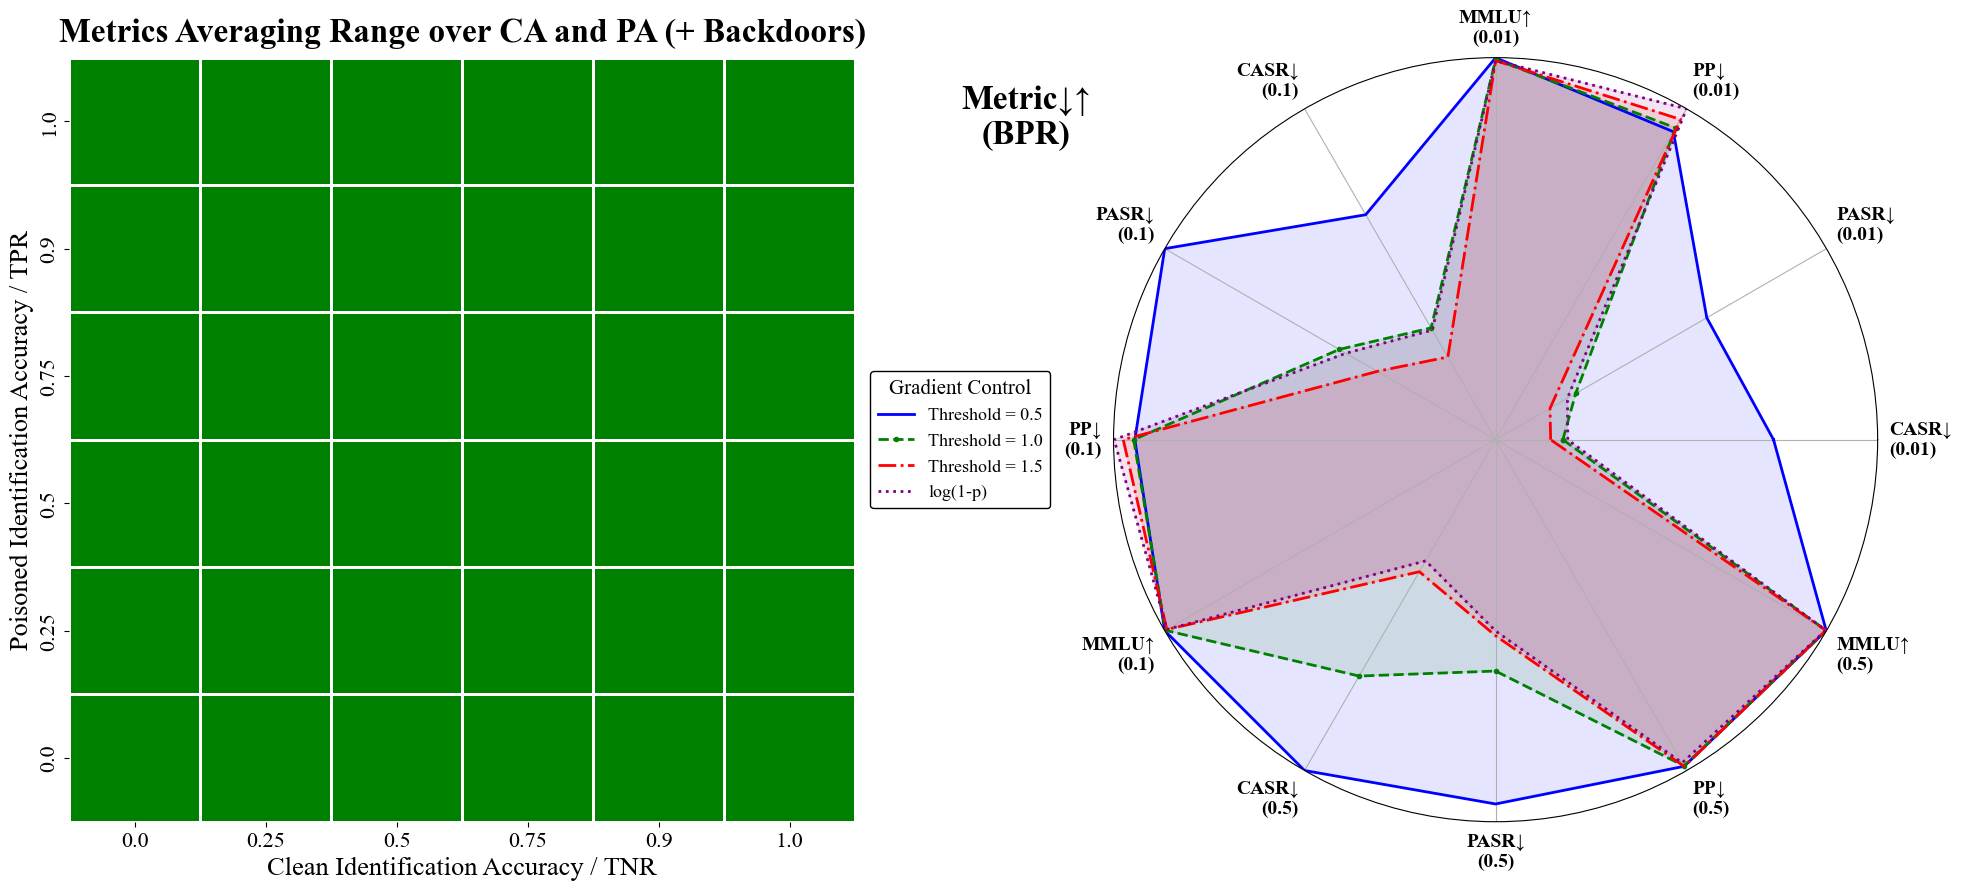

In [19]:
df_full = df.copy()
# df_full = df_full where: the trigger row is not StyleBkd, ca and pa are >= 0.75
df_full = df_full[~df_full["trigger"].str.contains("StyleBkd")]

group_0_5 = group_and_average(df_full[df_full['threshold'] == 0.5], 'threshold')
group_1_0 = group_and_average(df_full[df_full['threshold'] == 1.0], 'threshold')
group_1_5 = group_and_average(df_full[df_full['threshold'] == 1.5], 'threshold')
group_log1minusp = group_and_average(df_full[~df_full['log1minusp'].isnull()], 'log1minusp')

group_0_5_std = group_and_std(df_full[df_full['threshold'] == 0.5], 'threshold')
group_1_0_std = group_and_std(df_full[df_full['threshold'] == 1.0], 'threshold')
group_1_5_std = group_and_std(df_full[df_full['threshold'] == 1.5], 'threshold')
group_log1minusp_std = group_and_std(df_full[~df_full['log1minusp'].isnull()], 'log1minusp')

# Combine all groups to find max values for normalization
all_groups = pd.concat([group_0_5, group_1_0, group_1_5, group_log1minusp])
max_values = {
    'clean_asr': all_groups['clean_asr'].abs().max(),
    'poisoned_asr': all_groups['poisoned_asr'].abs().max(),
    'pp': all_groups['pp'].abs().max(),
    'mmlu': all_groups['mmlu'].abs().max()
} 

bpr_values = sorted(df_full['bpr'].unique())
categories = [f'{metric}\n({bpr})' for bpr in bpr_values for metric in ['CASR↓', 'PASR↓', 'PP↓', 'MMLU↑']]

angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
categories = np.concatenate((categories, [categories[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(20, 10))

# Add the 6x6 square subplot on the left
ax1 = fig.add_subplot(121)

# Create the 6x6 grid
grid = np.zeros((6, 6))
# add a thin white grid to ax1

# Plot the grid
sns.heatmap(grid, cmap=matplotlib.colors.ListedColormap(['green']), ax=ax1, cbar=False, linewidths=1, linecolor='white')
# im = ax1.imshow(grid, cmap=matplotlib.colors.ListedColormap(['black', 'green']), interpolation='nearest')
# flip y axis
ax1.invert_yaxis()
# set grids on ax1 going through .5 values
# ax1.set_xticks(np.arange(-.5, 6, 1), minor=True)
# ax1.set_yticks(np.arange(-.5, 6, 1), minor=True)

# Set x and y ticks
ticks = [0, 1, 2, 3, 4, 5]
tick_labels = ['0.0', '0.25', '0.5', '0.75', '0.9', '1.0']
# ax1.set_xticks(ticks)
# ax1.set_yticks(ticks)
ax1.set_xticklabels(tick_labels)
ax1.set_yticklabels(tick_labels)

# Add labels
ax1.set_xlabel('Clean Identification Accuracy / TNR', fontsize=19)
ax1.set_ylabel('Poisoned Identification Accuracy / TPR', fontsize=19)
ax1.set_title('Metrics Averaging Range over CA and PA (+ Backdoors)', y=1.01, fontsize=24, fontweight='bold')

# Add the radar plot on the right
ax2 = fig.add_subplot(122, projection='polar')

def plot_group(group, label, color, type_='-'):
    values = []
    for bpr in bpr_values:
        row = group[group['bpr'] == bpr].iloc[0]
        values.extend([
            row['clean_asr'] / max_values['clean_asr'],
            row['poisoned_asr'] / max_values['poisoned_asr'],
            row['pp'] / max_values['pp'],
            row['mmlu'] / max_values['mmlu']
        ])
    values = np.concatenate((values, [values[0]]))
    ax2.plot(angles, values, type_, linewidth=2, label=label, color=color)
    ax2.fill(angles, values, alpha=0.1, color=color)

plot_group(group_0_5, 'Threshold = 0.5', 'b')
plot_group(group_1_0, 'Threshold = 1.0', 'g', type_='--.')
plot_group(group_1_5, 'Threshold = 1.5', 'r', type_='-.')
plot_group(group_log1minusp, 'log(1-p)', 'purple', ':')

# Adjust the position and formatting of xticklabels
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels([])  # Remove default labels

# Create custom labels with better positioning
for angle, label in zip(angles[:-1], categories[:-1]):
    if angle < 1.57 or angle > 4.72:
        ha = 'left'
    elif angle > 1.58 and angle < 4.71:
        ha = 'right'
    else:
        ha = 'center'
    
    if angle < 3.14 and angle > 0:
        va = 'bottom'
    elif angle > 3.15:
        va = 'top'
    else:
        va = 'center'
    # print(angle, label, ha, va)
    ax2.text(angle, 1.03, label, size=14, fontweight='bold', ha=ha, va=va, rotation_mode='anchor')

# Increase figure size and adjust layout
# fig.set_size_inches(14, 12)
# plt.subplots_adjust(top=0.85, bottom=0.05, left=0.05, right=0.95)


ax2.set_ylim(0, 1)
ax2.set_yticks([])
# ax2.set_yticklabels(['0.25', '0.5', '0.75'], color="grey", size=7)

fig.suptitle('Metric↓↑\n(BPR)', fontsize=24, fontweight='bold', y=0.82, x=0.52,
             fontfamily='serif')    
plt.legend(loc='center left', bbox_to_anchor=(-0.33, 0.5), fontsize=13, title='Gradient Control', title_fontsize=15, frameon=True, framealpha=1, edgecolor='black', facecolor='white')

plt.tight_layout()
# plt.savefig('hmaps/full_3x3_radar_plot.pdf', bbox_inches='tight')
plt.show()

In [20]:
print(group_0_5)
print(group_1_0)
print(group_1_5)
print(group_log1minusp)
print("STDs")
print(group_0_5_std)
print(group_1_0_std)
print(group_1_5_std)
print(group_log1minusp_std)

    bpr  clean_asr  poisoned_asr        pp      mmlu  threshold
0  0.01   0.325556      0.525556  9.392506  0.472411        0.5
1  0.10   0.304259      0.823333  9.530614  0.472545        0.5
2  0.50   0.447500      0.785093  9.962875  0.472162        0.5
    bpr  clean_asr  poisoned_asr        pp      mmlu  threshold
0  0.01   0.078796      0.199352  9.508390  0.470295        1.0
1  0.10   0.151204      0.389074  9.560391  0.471622        1.0
2  0.50   0.319722      0.498611  9.950178  0.472434        1.0
    bpr  clean_asr  poisoned_asr        pp      mmlu  threshold
0  0.01   0.064444      0.135463  9.768828  0.468741        1.5
1  0.10   0.111852      0.294444  9.836090  0.469602        1.5
2  0.50   0.178611      0.422593  9.967096  0.471976        1.5
    bpr  clean_asr  poisoned_asr         pp      mmlu  log1minusp
0  0.01   0.084537      0.178704  10.091704  0.468842    1.092593
1  0.10   0.148241      0.372593  10.075985  0.469363    1.047222
2  0.50   0.163889      0.412315  

In [159]:
# df.poisoned_asr.hist()

## Scoring Plots

In [34]:
# for each type of trigger calculate how many there are
df.groupby(["trigger"]).size()

trigger
SCPN                         432
StyleBkd                     216
The current year is 2024.    432
[TRIGGER]                    432
dtype: int64

In [35]:
def stddev(df):
    stdev = df.std()
    if stdev < 1e-8:
        return 1
    print(stdev)
    return stdev

In [36]:
# for each combination of bpr, ca, pa calculate:
# the minimum of clean_asr, poisoned_asr, mmlu, pp and subtract these from the base values and then divide by the stds and then sum them and add to the new column: score

sub_df = df.copy()

# ## maybe don't average over bpr
# for bpr in df["bpr"].unique():
#     for ca in df["ca"].unique():
#         for pa in df["pa"].unique():
#             # get the part of the dataframe that corresponds to the current bpr, ca, pa
#             loc = (df["bpr"] == bpr) & (df["ca"] == ca) & (df["pa"] == pa)


# sub_df = df[loc].copy()

# chop into (0, 1)
# subtract from mmlu, pp, clean_asr, poisoned_asr the minimum of their columns
# sub_df["mmlu"] = sub_df["mmlu"] - sub_df["mmlu"].min()
# sub_df["mmlu"] = sub_df["mmlu"] / sub_df['mmlu'].max()#stddev(sub_df["mmlu"])
# sub_df["pp"] = -sub_df["pp"]
# sub_df["pp"] = sub_df["pp"] - sub_df["pp"].min()
# sub_df["pp"] = sub_df["pp"] / sub_df['pp'].max()#stddev(sub_df["pp"])
# sub_df["clean_asr"] = -sub_df["clean_asr"]
# sub_df["clean_asr"] = sub_df["clean_asr"] - sub_df["clean_asr"].min()
# sub_df["clean_asr"] = sub_df["clean_asr"] / sub_df['clean_asr'].max()#stddev(sub_df["clean_asr"])
# sub_df["poisoned_asr"] = -sub_df["poisoned_asr"]
# sub_df["poisoned_asr"] = sub_df["poisoned_asr"] - sub_df["poisoned_asr"].min()
# sub_df["poisoned_asr"] = sub_df["poisoned_asr"] / sub_df['poisoned_asr'].max()#stddev(sub_df["poisoned_asr"])

# Z-Score 
sub_df["mmlu"] = sub_df["mmlu"] - sub_df["mmlu"].mean()
sub_df["mmlu"] = sub_df["mmlu"] / stddev(sub_df["mmlu"])
sub_df["pp"] = -sub_df["pp"]
sub_df["pp"] = sub_df["pp"] - sub_df["pp"].mean()
sub_df["pp"] = sub_df["pp"] / stddev(sub_df["pp"])
sub_df["clean_asr"] = -sub_df["clean_asr"]
sub_df["clean_asr"] = sub_df["clean_asr"] - sub_df["clean_asr"].mean()
sub_df["clean_asr"] = sub_df["clean_asr"] / stddev(sub_df["clean_asr"])
sub_df["poisoned_asr"] = -sub_df["poisoned_asr"]
sub_df["poisoned_asr"] = sub_df["poisoned_asr"] - sub_df["poisoned_asr"].mean()
sub_df["poisoned_asr"] = sub_df["poisoned_asr"] / stddev(sub_df["poisoned_asr"])

# calculate score
sub_df["score"] = (sub_df["mmlu"] + sub_df["pp"] + sub_df["clean_asr"] + sub_df["poisoned_asr"]) / 4
# assign column score to df_score and set its corresponding part to loc to sub_df["score"]
# df_score.loc[loc, "score"] = sub_df["score"]
            
            # print(bpr, ca, pa)
            # # print the ranges, means and stds of the clean_asr, poisoned_asr, mmlu, pp
print(sub_df[["clean_asr", "poisoned_asr", "mmlu", "pp"]].min())
print(sub_df[["clean_asr", "poisoned_asr", "mmlu", "pp"]].max())
print(sub_df[["clean_asr", "poisoned_asr", "mmlu", "pp"]].mean())
print(sub_df[["clean_asr", "poisoned_asr", "mmlu", "pp"]].std())
print(sub_df["score"].min())
print(sub_df["score"].max())
print(sub_df["score"].mean())
print(sub_df["score"].std())

0.003856824116020464
0.4640432133502574
0.3642222978240565
0.41396163927599267
clean_asr      -2.181898
poisoned_asr   -1.423687
mmlu           -5.684208
pp             -5.647555
dtype: float64
clean_asr       0.563678
poisoned_asr    0.991996
mmlu            2.403311
pp              1.053436
dtype: float64
clean_asr       1.174839e-16
poisoned_asr   -2.067717e-16
mmlu           -8.667963e-15
pp              8.811294e-16
dtype: float64
clean_asr       1.0
poisoned_asr    1.0
mmlu            1.0
pp              1.0
dtype: float64
-2.5472637025297824
1.1577883677359528
-1.978429178273824e-15
0.6434562473542831


In [37]:
df_score = sub_df
df_score

,trigger,bpr,ca,pa,clean_asr,poisoned_asr,pp,mmlu,threshold,log1minusp,score
0,[TRIGGER],0.10,0.25,0.25,0.316577,-1.399530,0.405645,-0.070953,1.0,NaN,-0.187065
1,SCPN,0.50,0.00,0.90,-2.154442,-0.626512,-0.151050,-0.347922,0.5,NaN,-0.819982
2,[TRIGGER],0.10,0.50,0.50,0.563678,0.991996,-0.020678,2.181735,1.5,NaN,0.929183
3,[TRIGGER],0.10,0.50,0.75,0.563678,0.991996,-0.315119,0.316805,1.5,NaN,0.389340
4,The current year is 2024.,0.50,0.50,0.75,-2.072075,-1.254589,-0.197618,0.039835,0.5,NaN,-0.871112
...,...,...,...,...,...,...,...,...,...,...,...
1507,SCPN,0.50,0.90,0.25,0.563678,-0.795610,-0.422211,0.446058,1.5,NaN,-0.052021
1508,SCPN,0.10,0.75,0.50,0.234209,-0.529884,0.500146,0.686098,NaN,1.5,0.222642
1509,The current year is 2024.,0.50,0.50,0.75,-0.369817,-0.143375,-0.278822,0.464522,1.0,NaN,-0.081873
1510,[TRIGGER],0.01,0.75,0.90,0.563678,0.991996,0.696906,-0.883397,NaN,1.0,0.342296


<Axes: >

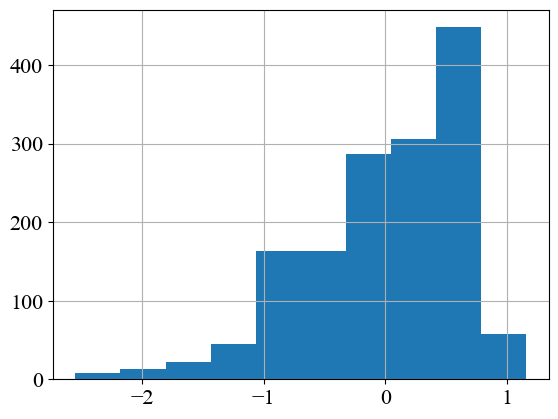

In [38]:
df_score['score'].hist()

In [39]:
redo_1 = True
redo_2 = True

In [40]:
pretty_names = {
    "clean_asr": "Clean ASR / Specificity",
    "poisoned_asr": "Poisoned ASR",
    "score": "Score",
}

trigger_order = ['[TRIGGER]', 'The current year is 2024.', 'SCPN']
bpr_order = [0.01, 0.1, 0.5]

def create_heatmap_grid(df, threshold, metric):
    if mode == 'threshold':
        title_suffix = f"Threshold = {threshold}"
    elif mode == 'scaling':
        title_suffix = f"Scaling = {threshold}"
    elif mode == 'interleave':
        title_suffix = f"Interleave = {threshold}"
    else:
        title_suffix = rf"$  \log(1-p)$ logit control"

    fig, axes = plt.subplots(3, 3, figsize=(22, 16), sharex=True, sharey=True)
    fig.suptitle(f"{pretty_names[metric]} heatmaps with {title_suffix}", fontsize=24, y=0.99,
                 fontweight='bold')

    for i, bpr in enumerate(bpr_order):
        for j, trigger in enumerate(trigger_order):
            if mode != 'log1minusp':
                df_subset = df[(df[mode] == threshold) & (df['bpr'] == bpr) & (df['trigger'] == trigger)]
                df_original_subset = df_original[df_original[mode].notnull() & (df_original[mode] == threshold) &
                                                 (df_original['bpr'] == bpr) & (df_original['trigger'] == trigger)]
            else:
                df_subset = df[(df['bpr'] == bpr) & (df['trigger'] == trigger)]
                df_original_subset = df_original[df_original[mode].notnull() & (df_original['bpr'] == bpr) &
                                                 (df_original['trigger'] == trigger)]
            pivot_data = df_subset.pivot(index='pa', columns='ca', values=metric)
            clean_pivot_data = df_original_subset.pivot(index='pa', columns='ca', values='clean_asr')
            poisoned_pivot_data = df_original_subset.pivot(index='pa', columns='ca', values='poisoned_asr')
            
            cmap = "Blues_r"
            sns.heatmap(pivot_data, ax=axes[i, j], cmap=cmap,
                        cbar=False,
                        annot=True, fmt='.2f')

            # Create a mask for cells where clean_pivot_data > 0.05
            clean_mask = clean_pivot_data > 0.05
            poisoned_mask = poisoned_pivot_data > 0.05
            
            # Apply grey color to clean_masked cells
            for yi, xi in np.ndindex(clean_mask.shape):
                if clean_mask.iloc[yi, xi]:
                    rect = plt.Rectangle((xi, yi), 1, 1, fill=True, facecolor='black', edgecolor='none')
                    axes[i,j].add_patch(rect)
                    axes[i,j].text(xi + 0.5, yi + 0.5, f'{pivot_data.iloc[yi, xi]:.2f}',
                            ha="center", va="center", color='white')
            
            # Apply black color to clean_masked cells
            for yi, xi in np.ndindex(poisoned_mask.shape):
                if poisoned_mask.iloc[yi, xi]:
                    rect = plt.Rectangle((xi, yi), 1, 1, fill=False, facecolor='black', edgecolor='red',
                                         linewidth=2.0)
                    axes[i,j].add_patch(rect)

                    # text_color = 'red' if poisoned_mask.iloc[yi, xi] else 'black'


            # good_mask = ~clean_mask & ~poisoned_mask
            # # Apply black color to clean_masked cells
            # for yi, xi in np.ndindex(good_mask.shape):
            #     if good_mask.iloc[yi, xi]:
            #         rect = plt.Rectangle((xi, yi), 1, 1, fill=False, edgecolor='green',
            #                              linewidth=2.0)
            #         axes[i,j].add_patch(rect)
            
            
            axes[i, j].invert_yaxis()
            axes[i, j].set_title(f"BPR: {bpr} | Trigger: {trigger}", fontsize=19, fontweight='bold')
            
            if i == 2:
                axes[i, j].set_xlabel("Clean Identification Accuracy / TNR", fontsize=19)
            else:
                axes[i, j].set_xlabel("")  # Remove x-axis label for non-bottom plots
            if j == 0:
                axes[i, j].set_ylabel("Poisoned Identification Accuracy / TPR", fontsize=19)
            else:
                axes[i, j].set_ylabel("")  # Remove y-axis label for non-leftmost plots

            # rect = patches.Rectangle((3, 3), 3, 3, linewidth=1.5, edgecolor='green', facecolor='none')
            # axes[i, j].add_patch(rect)

    plt.tight_layout()
    if mode != 'log1minusp':
        plt.savefig(f"hmaps/heatmap_grid_{metric}_{mode}_{threshold}.pdf", dpi='figure', bbox_inches='tight')
    else:
        plt.savefig(f"hmaps/heatmap_grid_{metric}_{mode}.pdf", dpi='figure', bbox_inches='tight')
    # plt.show()
    plt.close()

# Create a heatmap grid for each threshold and metric
for mode in ['threshold', 'log1minusp']:
    # Convert results to a DataFrame for easier manipulation
    df = df_score[df_score[mode].notnull()]
    if mode != 'log1minusp':
        for threshold in [0.5, 1.0, 1.5]:
            for metric in ["score"]:
                if os.path.exists(f"hmaps/heatmap_grid_{metric}_{mode}_{threshold}.pdf") and not redo_1:
                    continue
                create_heatmap_grid(df, threshold, metric)
    else:
        for metric in ["score"]:
            if os.path.exists(f"hmaps/heatmap_grid_{metric}_{mode}.pdf") and not redo_2:
                continue
            create_heatmap_grid(df, None, metric)


In [41]:
# Now handle style backdoor
def create_heatmap(ax, data, orig_data, metric):
    pivot_data = data.pivot(index='pa', columns='ca', values=metric)
    clean_pivot_data = orig_data.pivot(index='pa', columns='ca', values='clean_asr')
    poisoned_pivot_data = orig_data.pivot(index='pa', columns='ca', values='poisoned_asr')
    cmap = "Blues_r"
    sns.heatmap(pivot_data, ax=ax, cmap=cmap, cbar=False, annot=True, fmt='.2f')
    ax.invert_yaxis()
    ax.set_xlabel("Clean Identification Accuracy / TNR", fontsize=19)
    ax.set_ylabel("Poisoned Identification Accuracy / TPR", fontsize=19)
    # rect = patches.Rectangle((3, 3), 3, 3, linewidth=1.5, edgecolor='green', facecolor='none')
    # ax.add_patch(rect)
    clean_mask = clean_pivot_data > 0.05
    poisoned_mask = poisoned_pivot_data > 0.05

    # Apply grey color to clean_masked cells
    for yi, xi in np.ndindex(clean_mask.shape):
        if clean_mask.iloc[yi, xi]:
            rect = plt.Rectangle((xi, yi), 1, 1, fill=True, facecolor='black', edgecolor='none')
            ax.add_patch(rect)
            ax.text(xi + 0.5, yi + 0.5, f'{pivot_data.iloc[yi, xi]:.2f}',
                    ha="center", va="center", color='white')
    
    # Apply black color to clean_masked cells
    for yi, xi in np.ndindex(poisoned_mask.shape):
        if poisoned_mask.iloc[yi, xi]:
            rect = plt.Rectangle((xi, yi), 1, 1, fill=False, facecolor='black', edgecolor='red',
                                    linewidth=2.0)
            ax.add_patch(rect)

            # text_color = 'red' if poisoned_mask.iloc[yi, xi] else 'black'


    # good_mask = ~clean_mask & ~poisoned_mask
    # # Apply black color to clean_masked cells
    # for yi, xi in np.ndindex(good_mask.shape):
    #     if good_mask.iloc[yi, xi]:
    #         rect = plt.Rectangle((xi, yi), 1, 1, fill=False, edgecolor='green',
    #                                 linewidth=2.0)
    #         ax.add_patch(rect)


def create_3x2_heatmaps(df, metric):
    fig, axes = plt.subplots(3, 2, figsize=(14, 16), sharex=True, sharey=True)
    
    bpr_values = [0.01, 0.1, 0.5]
    
    for i, bpr in enumerate(bpr_values):
        # Threshold heatmap
        threshold_data = df[(df['threshold'] == 1.0) & (df['bpr'] == bpr) & (df['trigger'] == 'StyleBkd')]
        threshold_orig_data = df_original[(df_original['threshold'] == 1.0) & (df_original['bpr'] == bpr) & (df_original['trigger'] == 'StyleBkd')]
        create_heatmap(axes[i, 0], threshold_data, threshold_orig_data, metric)
        axes[i, 0].set_title(f"Threshold = 1.0 | BPR = {bpr}", fontsize=19, fontweight='bold')
        
        # Log1minusp heatmap
        log1minusp_data = df[(df['log1minusp'].notnull()) & (df['bpr'] == bpr) & (df['trigger'] == 'StyleBkd')]
        log1minusp_orig_data = df_original[(df_original['log1minusp'].notnull()) & (df_original['bpr'] == bpr) & (df_original['trigger'] == 'StyleBkd')]
        create_heatmap(axes[i, 1], log1minusp_data, log1minusp_orig_data, metric)
        axes[i, 1].set_title(fr"$\log(1-p)$ | BPR = {bpr}", fontsize=19, fontweight='bold')
    
    fig.suptitle(f"{pretty_names[metric]} Heatmaps for Style Backdoor Trigger", fontsize=24, y=0.99, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"hmaps/style_bkd_3x2_grid_{metric}.pdf", dpi='figure', bbox_inches='tight')
    # plt.show()
    plt.close()

# Create 3x2 heatmap grids for each metric
for metric in ["score"]:
    if os.path.exists(f"hmaps/style_bkd_3x2_grid_{metric}.pdf") and not redo_2:
        continue
    df = sub_df
    create_3x2_heatmaps(df, metric)